In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('df_cleaned_sale.csv')
df.describe()

,BathroomCount,BedroomCount,ConstructionYear,Fireplace,Furnished,Garden,GardenArea,LivingArea,NumberOfFacades,PostalCode,...,PropertyId,RoomCount,ShowerCount,SurfaceOfPlot,SwimmingPool,Terrace,ToiletCount,Condition_Rank,PEB_Rank,Kitchen_Rank
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,...,9.614600e+04,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,1.141472,2.653371,1993.830529,0.030194,0.018399,0.188224,168.782809,143.040699,2.871414,5309.382481,...,1.228791e+07,5.325359,0.238907,460.659757,0.012845,0.580939,1.289809,4.174505,5.130021,3.019418
std,0.650403,1.245801,31.869623,0.171121,0.134390,0.390893,257.865458,82.520724,0.683706,3048.681910,...,2.964620e+06,2.404414,0.583282,550.871895,0.112606,0.493408,0.828498,0.810471,1.723903,0.607242
min,0.000000,0.000000,1753.000000,0.000000,0.000000,0.000000,1.000000,12.000000,1.000000,1000.000000,...,2.784938e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000
25%,1.000000,2.000000,1986.000000,0.000000,0.000000,0.000000,127.000000,93.000000,2.000000,2381.000000,...,1.111738e+07,5.000000,0.000000,333.000000,0.000000,0.000000,1.000000,4.000000,4.000000,3.000000
50%,1.000000,3.000000,2002.000000,0.000000,0.000000,0.000000,127.000000,120.000000,3.000000,4860.000000,...,1.136314e+07,5.000000,0.000000,333.000000,0.000000,1.000000,1.000000,4.000000,6.000000,3.000000
75%,1.000000,3.000000,2016.000000,0.000000,0.000000,0.000000,127.000000,170.000000,3.000000,8460.000000,...,1.146100e+07,5.000000,0.000000,348.000000,0.000000,1.000000,2.000000,4.000000,6.000000,3.000000
max,12.000000,10.000000,2027.000000,1.000000,1.000000,1.000000,4000.000000,1000.000000,6.000000,9992.000000,...,2.002586e+07,15.000000,6.000000,6000.000000,1.000000,1.000000,6.000000,6.000000,9.000000,4.000000


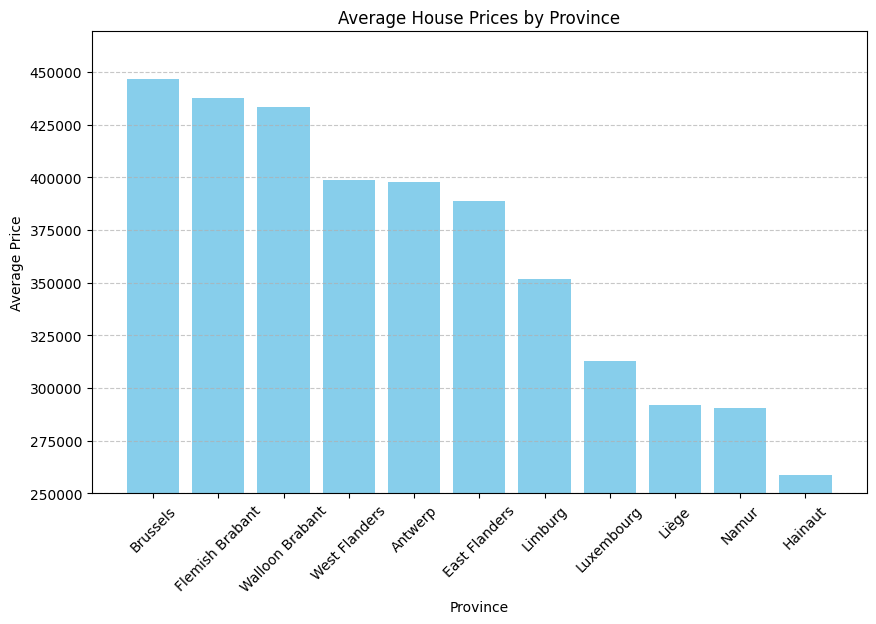

In [27]:
# Group by provinces and find each mean value of prices for each province
average_prices = df.groupby('Province')['Price'].mean().reset_index()

#sort
average_prices = average_prices.sort_values(by='Price', ascending=False)

# Visualize
plt.figure(figsize=(10, 6))
plt.bar(average_prices['Province'], average_prices['Price'], color='skyblue')
plt.locator_params(axis='y', nbins=10)
plt.ylim(bottom=250000)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xlabel('Province')
plt.ylabel('Average Price')
plt.title('Average House Prices by Province')
plt.xticks(rotation=45)
plt.show()


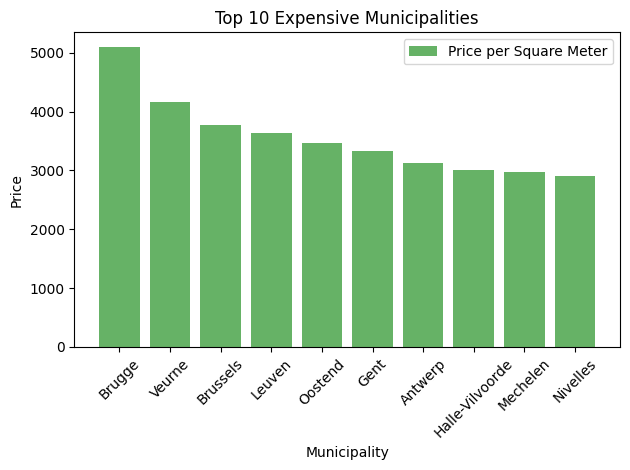

In [28]:
df['price_per_sqm'] = df['Price'] / df['LivingArea']
average_pp_sqm = df.groupby('District')['price_per_sqm'].mean().reset_index()
average_pp_sqm = average_pp_sqm.sort_values(by='price_per_sqm', ascending=False)

top_10_expensive = average_pp_sqm.head(10)
bottom_10_cheap = average_pp_sqm.tail(10)


plt.bar(top_10_expensive['District'], top_10_expensive['price_per_sqm'], color='green', alpha=0.6, label='Price per Square Meter')
plt.xlabel('Municipality')
plt.ylabel('Price')
plt.title('Top 10 Expensive Municipalities')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

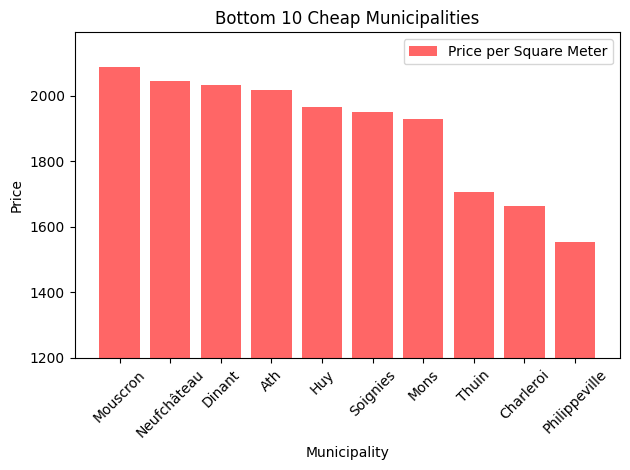

In [29]:
plt.bar(bottom_10_cheap['District'], bottom_10_cheap['price_per_sqm'], color='red', alpha=0.6, label='Price per Square Meter')
plt.xlabel('Municipality')
plt.ylabel('Price')
plt.title('Bottom 10 Cheap Municipalities')
plt.xticks(rotation=45)
plt.ylim(bottom=1200)
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
# Group by municipalitites and find each mean and median value of prices for each province
mun_average_prices = df.groupby('District')['Price'].mean().reset_index()
mun_median_prices= df.groupby('District')['Price'].median().reset_index()

#sort
mun_average_prices = mun_average_prices.sort_values(by='Price', ascending=False)
mun_median_prices = mun_average_prices.sort_values(by='Price', ascending=False)

top_10_mun_mean = mun_average_prices.head(10)
top_10_mun_median = mun_median_prices.head(10)

bottom_10_mun_mean = mun_average_prices.tail(10)
bottom_10_mun_median = mun_median_prices.tail(10)

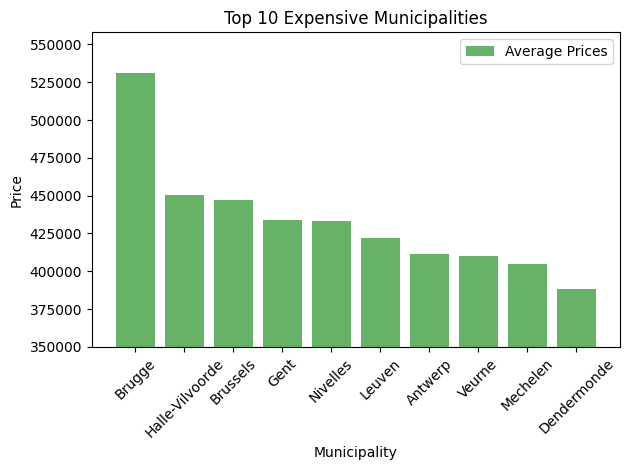

In [31]:
plt.bar(top_10_mun_mean['District'], top_10_mun_mean['Price'], color='green', alpha=0.6, label='Average Prices')
plt.xlabel('Municipality')
plt.ylabel('Price')
plt.title('Top 10 Expensive Municipalities')
plt.xticks(rotation=45)
plt.ylim(bottom=350000)
plt.legend()
plt.tight_layout()
plt.show()



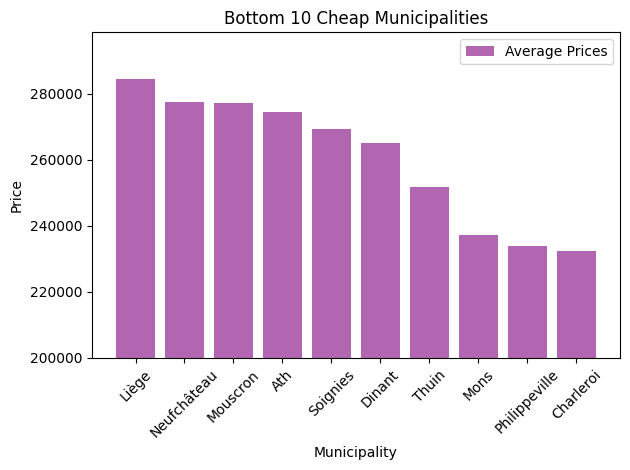

In [32]:
plt.bar(bottom_10_mun_mean['District'], bottom_10_mun_mean['Price'], color='purple', alpha=0.6, label='Average Prices')
plt.xlabel('Municipality')
plt.ylabel('Price')
plt.title('Bottom 10 Cheap Municipalities')
plt.xticks(rotation=45)
plt.ylim(bottom=200000)
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
flanders = df[df['Region'] == "Flanders"]
wallonie = df[df['Region'] == "Wallonie"]
brussels = df[df['Region'] == "Brussels"]

In [34]:
average_pp_sqm_fl = flanders.groupby('District')['price_per_sqm'].mean().reset_index()
average_pp_sqm_wa = wallonie.groupby('District')['price_per_sqm'].mean().reset_index()
average_pp_sqm_bru = brussels.groupby('Locality')['price_per_sqm'].mean().reset_index()

average_pp_sqm_fl = average_pp_sqm_fl.sort_values(by='price_per_sqm', ascending=False)
average_pp_sqm_wa = average_pp_sqm_wa.sort_values(by='price_per_sqm', ascending=False)
average_pp_sqm_bru = average_pp_sqm_bru.sort_values(by='price_per_sqm', ascending=False)


In [35]:
top_10_expensive_fl = average_pp_sqm_fl.head(10)
bottom_10_cheap_fl = average_pp_sqm_fl.tail(10)

top_10_expensive_wa = average_pp_sqm_wa.head(10)
bottom_10_cheap_wa = average_pp_sqm_wa.tail(10)

top_10_expensive_bru = average_pp_sqm_bru.head(10)
bottom_10_cheap_bru = average_pp_sqm_bru.tail(10)

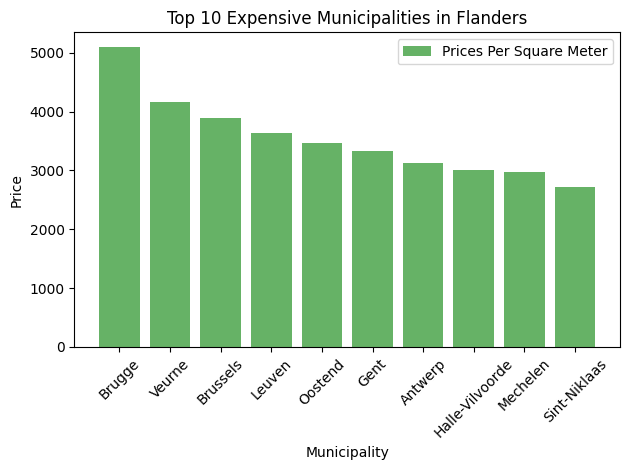

In [36]:
plt.bar(top_10_expensive_fl['District'], top_10_expensive_fl['price_per_sqm'], color='green', alpha=0.6, label='Prices Per Square Meter')
plt.xlabel('Municipality')
plt.ylabel('Price')
plt.title('Top 10 Expensive Municipalities in Flanders')
plt.xticks(rotation=45)
#plt.ylim(bottom=2000)
plt.legend()
plt.tight_layout()
plt.show()

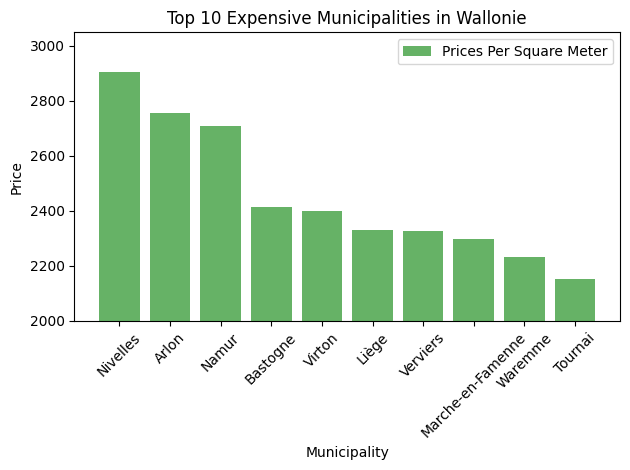

In [37]:
plt.bar(top_10_expensive_wa['District'], top_10_expensive_wa['price_per_sqm'], color='green', alpha=0.6, label='Prices Per Square Meter')
plt.xlabel('Municipality')
plt.ylabel('Price')
plt.title('Top 10 Expensive Municipalities in Wallonie')
plt.xticks(rotation=45)
plt.ylim(bottom=2000)
plt.legend()
plt.tight_layout()
plt.show()

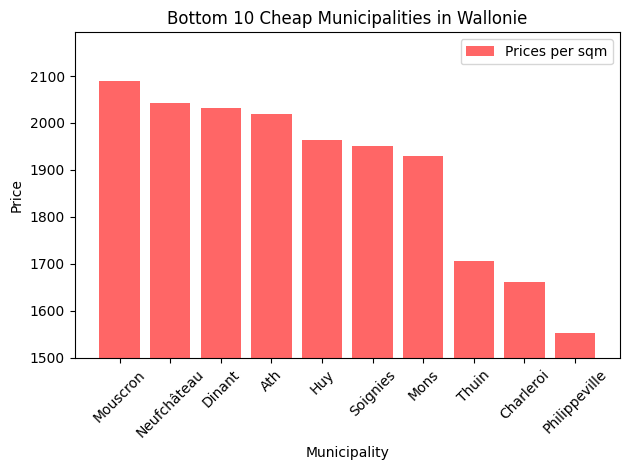

In [38]:
plt.bar(bottom_10_cheap_wa['District'], bottom_10_cheap_wa['price_per_sqm'], color='red', alpha=0.6, label='Prices per sqm')
plt.xlabel('Municipality')
plt.ylabel('Price')
plt.title('Bottom 10 Cheap Municipalities in Wallonie')
plt.xticks(rotation=45)
plt.ylim(bottom=1500)
plt.legend()
plt.tight_layout()
plt.show()

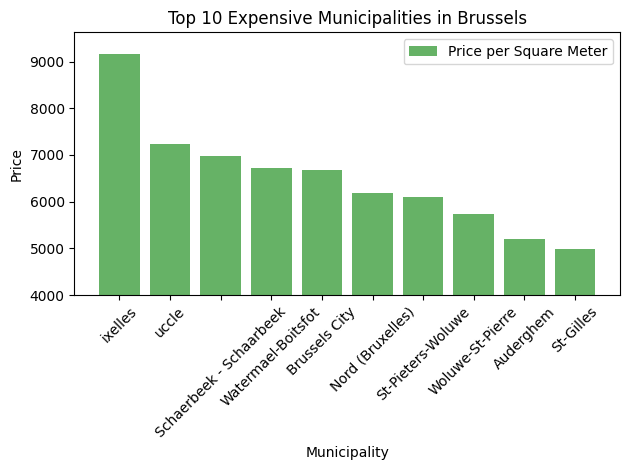

In [39]:
plt.bar(top_10_expensive_bru['Locality'], top_10_expensive_bru['price_per_sqm'], color='green', alpha=0.6, label='Price per Square Meter')
plt.xlabel('Municipality')
plt.ylabel('Price')
plt.title('Top 10 Expensive Municipalities in Brussels')
plt.xticks(rotation=45)
plt.ylim(bottom=4000)
plt.legend()
plt.tight_layout()
plt.show()

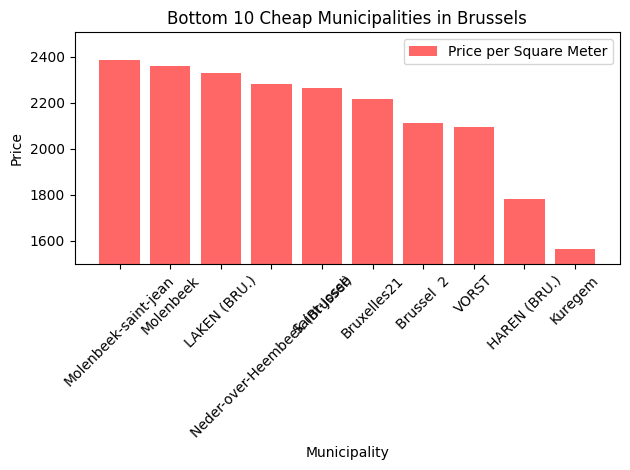

In [40]:
plt.bar(bottom_10_cheap_bru['Locality'], bottom_10_cheap_bru['price_per_sqm'], color='red', alpha=0.6, label='Price per Square Meter')
plt.xlabel('Municipality')
plt.ylabel('Price')
plt.title('Bottom 10 Cheap Municipalities in Brussels')
plt.xticks(rotation=45)
plt.ylim(bottom=1500)
plt.legend()
plt.tight_layout()
plt.show()